<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Classificadores_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn==0.22

In [1]:
!python --version

Python 3.7.10


In [2]:
pip install xgboost

In [7]:
pip install six

In [3]:
pip install catboost

     |████████████████████████████████| 67.3MB 76kB/s 


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Apr 20 10:37:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas_profiling import ProfileReport
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE,SVMSMOTE
from imblearn.pipeline import make_pipeline,Pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from collections import Counter


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [6]:
import sklearn
sklearn.__version__

'0.22'

# **Carrega dados**

In [6]:
analise_tx_pdr3 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3.csv",sep = ',',encoding = 'utf8')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_FERRO',                 
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CHUMBO','TX_COBRE',
#                 'TX_SILICIO','TX_SODIO',
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
#                 'TX_SILICIO','TX_SODIO',
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_FERRO','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['LIM_VISCOSIDADE','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]                 

df1.head()


,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,-0.005987,0.002207,0.012396,-0.011976,0.015193,-0.011459,-0.006592,-0.001284,0.000665,-0.060797,0.827206,1.011723,0.264321,0.141778,0.141181,0.108560,NORMAL
1,-0.520636,-0.031211,-0.010256,-0.084438,-0.005985,-0.244569,-0.006592,-0.050236,0.004019,-0.060797,-0.924824,1.874883,-0.831715,-1.820821,-1.485238,1.606313,NORMAL
2,0.049304,0.013901,0.016726,0.012731,0.012103,0.050268,-0.020807,-0.003051,0.000674,-0.060797,-0.860474,1.011723,-0.493211,-3.157567,0.141181,0.108560,NORMAL
3,-0.373132,0.028537,-0.085814,-0.085898,-0.038375,-0.817682,-0.274444,0.024486,0.002770,-0.060797,-0.713418,1.901120,-1.280694,-0.983736,-0.988643,1.567189,NORMAL
4,0.227177,-0.020013,-0.086977,-0.121298,0.013229,-0.754549,-0.345889,-0.072321,0.001976,-0.060797,-0.788370,1.803927,0.093297,-1.602212,-1.232376,1.600133,NORMAL


In [8]:
filtro_target = df1['TARGET']!='NORMAL'
df1 = df1[filtro_target]


In [8]:
df1.groupby('TARGET').count()

,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN
TARGET,,,,,,,,,,,,,,,,
BAIXA,19213,19213,19213,19213,19213,19213,19213,19213,19213,19213,19213,19213,19213,19213,19213,19213
CRITICA,22371,22371,22371,22371,22371,22371,22371,22371,22371,22371,22371,22371,22371,22371,22371,22371
MEDIA,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371
NORMAL,129005,129005,129005,129005,129005,129005,129005,129005,129005,129005,129005,129005,129005,129005,129005,129005


In [9]:
df1.shape

(175960, 17)

In [10]:
#colunas = ['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','NIQUEL','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE','AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO']
#colunas = ['PRATA','DIESEL','SODIO','ESTANHO','NIQUEL','AGUA','Target']
#cols = ['Target']

array = df1.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:16]
Y = array[:,16]
y = LabelEncoder().fit_transform(Y)




X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)


array([3, 3, 3, ..., 3, 3, 3])

In [11]:
X_train.shape

(131970, 16)

In [12]:
y_test.shape

(43990,)

In [25]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [26]:
X_train_smt.shape

(361384, 16)

In [22]:
y_label = Y
#X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.30, random_state=42)

classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe BAIXA', 'Classe CRITICA', 'Classe MEDIA', 'Classe NORMAL']


In [38]:
np.unique(y_train_smt)
from collections import Counter
Counter(y_train_smt).values()

dict_values([15606, 15606, 15606])

# **Análise por score com gráfico de barras de vários classificadores**

In [12]:
names = ["Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "Neural_Net", "AdaBoost","QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]
  

In [14]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [15]:
df = pd.DataFrame()
df['Classificador'] = names
df['Score'] = scores
df

,Classificador,Score
0,Nearest_Neighbors,0.670302
1,Decision_Tree,0.613585
2,Extra_Trees,0.687952
3,Random_Forest,0.652752
4,Neural_Net,0.693704
5,AdaBoost,0.544274
6,QDA,0.557858


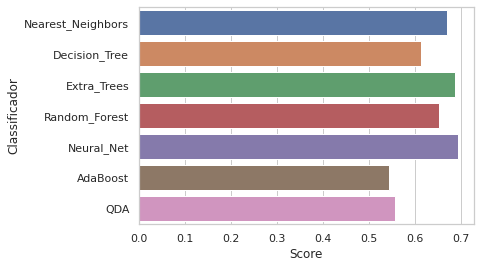

In [16]:
sns.set(style="whitegrid")
ax=sns.barplot(y="Classificador", x="Score", data=df)
ax.get_figure()

# **Análise de vários classificadores - indicadores**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Logistic_Regression
                precision    recall  f1-score   support

  Classe BAIXA       0.20      0.35      0.25      4803
Classe CRITICA       0.58      0.67      0.62      5593
  Classe MEDIA       0.16      0.43      0.23      1343
 Classe NORMAL       0.91      0.72      0.81     32251

      accuracy                           0.66     43990
     macro avg       0.46      0.54      0.48     43990
  weighted avg       0.77      0.66      0.70     43990

Training Score:0.664984466166553
Cross V Score: 0.6649693112070926 +/- 0.0030073908758063753
Testing Score: 0.6644010002273244
Cross & Test Diff: 0.0005683109797681718
Standard Deviations Away: 0.18897143844522368
[[ 1666   688  1412  1037]
 [  389  3726   608   870]
 [  248   261   572   262]
 [ 6230  1792   966 23263]]
Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Logistic_Regression
                precision    recall  f1-score   support

  Classe BAIXA       0.20      0.35      0.25      4803
Classe CRITICA       0.58      0.67      0.62      5593
  Classe MEDIA       0.16      0.43      0.23      1343
 Classe NORMAL       0.91      0.72      0.81     32251

      accuracy                           0.66     43990
     macro avg       0.46      0.54      0.48     43990
  weighted avg       0.77      0.66      0.70     43990

Training Score:0.664984466166553
Cross V Score: 0.6649693112070926 +/- 0.0030073908758063753
Testing Score: 0.6644010002273244
Cross & Test Diff: 0.0005683109797681718
Standard Deviations Away: 0.18897143844522368
[[ 1666   688  1412  1037]
 [  389  3726   608   870]
 [  248   261   572   262]
 [ 6230  1792   966 23263]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Nearest_Neighbors
                precision    recall  f1-score   support

  Classe BAIXA       0.38      0.58      0.46      4803
Classe CRITICA       0.60      0.65      0.62      5593
  Classe MEDIA       0.15      0.38      0.22      1343
 Classe NORMAL       0.92      0.78      0.84     32251

      accuracy                           0.73     43990
     macro avg       0.51      0.60      0.54     43990
  weighted avg       0.80      0.73      0.76     43990

Training Score:0.8810184132757445
Cross V Score: 0.7206713647040995 +/- 0.0033054318063990232
Testing Score: 0.7295521709479427
Cross & Test Diff: -0.008880806243843131
Standard Deviations Away: -2.686731042719041
[[ 2798   461   467  1077]
 [  708  3656   481   748]
 [  369   186   514   274]
 [ 3416  1839  1871 25125]]
Classificador:  Nearest_Neighbors


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Nearest_Neighbors
                precision    recall  f1-score   support

  Classe BAIXA       0.38      0.58      0.46      4803
Classe CRITICA       0.60      0.65      0.62      5593
  Classe MEDIA       0.15      0.38      0.22      1343
 Classe NORMAL       0.92      0.78      0.84     32251

      accuracy                           0.73     43990
     macro avg       0.51      0.60      0.54     43990
  weighted avg       0.80      0.73      0.76     43990

Training Score:0.8810184132757445
Cross V Score: 0.7206713647040995 +/- 0.0033054318063990232
Testing Score: 0.7295521709479427
Cross & Test Diff: -0.008880806243843131
Standard Deviations Away: -2.686731042719041
[[ 2798   461   467  1077]
 [  708  3656   481   748]
 [  369   186   514   274]
 [ 3416  1839  1871 25125]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Decision_Tree
                precision    recall  f1-score   support

  Classe BAIXA       0.62      0.89      0.73      4803
Classe CRITICA       1.00      0.56      0.72      5593
  Classe MEDIA       0.64      0.84      0.73      1343
 Classe NORMAL       0.95      0.94      0.95     32251

      accuracy                           0.89     43990
     macro avg       0.80      0.81      0.78     43990
  weighted avg       0.91      0.89      0.89     43990

Training Score:0.8877169053572782
Cross V Score: 0.8870425096612866 +/- 0.0019842003611779345
Testing Score: 0.8869061150261422
Cross & Test Diff: 0.00013639463514436567
Standard Deviations Away: 0.06874035395467525
[[ 4258     0   131   414]
 [  657  3160   491  1285]
 [  154    15  1124    50]
 [ 1778     0     0 30473]]
Classificador:  Decision_Tree


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Decision_Tree
                precision    recall  f1-score   support

  Classe BAIXA       0.62      0.89      0.73      4803
Classe CRITICA       1.00      0.56      0.72      5593
  Classe MEDIA       0.64      0.84      0.73      1343
 Classe NORMAL       0.95      0.94      0.95     32251

      accuracy                           0.89     43990
     macro avg       0.80      0.81      0.78     43990
  weighted avg       0.91      0.89      0.89     43990

Training Score:0.8877169053572782
Cross V Score: 0.8870425096612866 +/- 0.0020026061848751288
Testing Score: 0.8869061150261422
Cross & Test Diff: 0.00013639463514436567
Standard Deviations Away: 0.06810856581513577
[[ 4258     0   131   414]
 [  657  3160   491  1285]
 [  154    15  1124    50]
 [ 1778     0     0 30473]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Extra_Trees
                precision    recall  f1-score   support

  Classe BAIXA       0.80      0.69      0.74      4803
Classe CRITICA       0.95      0.89      0.92      5593
  Classe MEDIA       0.83      0.49      0.61      1343
 Classe NORMAL       0.94      0.98      0.96     32251

      accuracy                           0.93     43990
     macro avg       0.88      0.76      0.81     43990
  weighted avg       0.92      0.93      0.92     43990

Training Score:1.0
Cross V Score: 0.9211790558460256 +/- 0.0013570248635613258
Testing Score: 0.9250056831097977
Cross & Test Diff: -0.003826627263772142
Standard Deviations Away: -2.819865255622276
[[ 3312    64    56  1371]
 [  143  4986    78   386]
 [  231   144   656   312]
 [  464    48     2 31737]]
Classificador:  Extra_Trees


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Extra_Trees
                precision    recall  f1-score   support

  Classe BAIXA       0.80      0.69      0.74      4803
Classe CRITICA       0.95      0.89      0.92      5593
  Classe MEDIA       0.83      0.48      0.61      1343
 Classe NORMAL       0.94      0.98      0.96     32251

      accuracy                           0.93     43990
     macro avg       0.88      0.76      0.81     43990
  weighted avg       0.92      0.93      0.92     43990

Training Score:1.0
Cross V Score: 0.9205046601500341 +/- 0.0005477841804024712
Testing Score: 0.9253239372584678
Cross & Test Diff: -0.004819277108433773
Standard Deviations Away: -8.797766129158614
[[ 3309    66    50  1378]
 [  140  4991    79   383]
 [  257   125   640   321]
 [  434    51     1 31765]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Random_Forest
                precision    recall  f1-score   support

  Classe BAIXA       0.59      0.76      0.66      4803
Classe CRITICA       1.00      0.90      0.94      5593
  Classe MEDIA       0.74      0.94      0.83      1343
 Classe NORMAL       0.96      0.93      0.94     32251

      accuracy                           0.90     43990
     macro avg       0.82      0.88      0.84     43990
  weighted avg       0.92      0.90      0.91     43990

Training Score:0.9044934454800333
Cross V Score: 0.9063044631355611 +/- 0.008536857403244455
Testing Score: 0.9037508524664697
Cross & Test Diff: 0.002553610669091433
Standard Deviations Away: 0.29912771743392674
[[ 3631    10    93  1069]
 [  100  5009   347   137]
 [   10     6  1264    63]
 [ 2399     0     0 29852]]
Classificador:  Random_Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Random_Forest
                precision    recall  f1-score   support

  Classe BAIXA       0.60      0.78      0.68      4803
Classe CRITICA       1.00      0.91      0.95      5593
  Classe MEDIA       0.74      0.90      0.81      1343
 Classe NORMAL       0.96      0.93      0.94     32251

      accuracy                           0.91     43990
     macro avg       0.83      0.88      0.85     43990
  weighted avg       0.92      0.91      0.91     43990

Training Score:0.9079563537167538
Cross V Score: 0.89937106918239 +/- 0.006862846043557045
Testing Score: 0.9078881563991816
Cross & Test Diff: -0.008517087216791674
Standard Deviations Away: -1.241043025406006
[[ 3742     6    87   968]
 [   58  5065   332   138]
 [   76     6  1210    51]
 [ 2330     0     0 29921]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Neural_Net
                precision    recall  f1-score   support

  Classe BAIXA       0.45      0.68      0.54      4803
Classe CRITICA       0.78      0.76      0.77      5593
  Classe MEDIA       0.47      0.53      0.50      1343
 Classe NORMAL       0.94      0.87      0.90     32251

      accuracy                           0.82     43990
     macro avg       0.66      0.71      0.68     43990
  weighted avg       0.85      0.82      0.83     43990

Training Score:0.8232477078123817
Cross V Score: 0.8297037205425476 +/- 0.003323517508062241
Testing Score: 0.823982723346215
Cross & Test Diff: 0.005720997196332567
Standard Deviations Away: 1.7213681536066778
[[ 3265   260   385   893]
 [  384  4271   384   554]
 [  236    91   714   302]
 [ 3383   825    46 27997]]
Classificador:  Neural_Net


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Neural_Net
                precision    recall  f1-score   support

  Classe BAIXA       0.46      0.67      0.54      4803
Classe CRITICA       0.81      0.75      0.78      5593
  Classe MEDIA       0.46      0.55      0.50      1343
 Classe NORMAL       0.94      0.88      0.91     32251

      accuracy                           0.83     43990
     macro avg       0.67      0.71      0.68     43990
  weighted avg       0.86      0.83      0.84     43990

Training Score:0.8268773206031674
Cross V Score: 0.8205046601500342 +/- 0.004146910350554269
Testing Score: 0.8285292111843601
Cross & Test Diff: -0.008024551034325866
Standard Deviations Away: -1.9350674010238293
[[ 3233   236   405   929]
 [  379  4197   428   589]
 [  231    80   733   299]
 [ 3249   687    31 28284]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  AdaBoost
                precision    recall  f1-score   support

  Classe BAIXA       0.78      0.86      0.81      4803
Classe CRITICA       0.90      0.66      0.77      5593
  Classe MEDIA       0.34      0.74      0.47      1343
 Classe NORMAL       1.00      0.98      0.99     32251

      accuracy                           0.92     43990
     macro avg       0.75      0.81      0.76     43990
  weighted avg       0.94      0.92      0.93     43990

Training Score:0.9181707963931196
Cross V Score: 0.8885049632492233 +/- 0.004843888729976066
Testing Score: 0.9190497840418277
Cross & Test Diff: -0.030544820792604344
Standard Deviations Away: -6.305846912539477
[[ 4111    81   602     9]
 [  525  3711  1317    40]
 [  260    84   999     0]
 [  400   225    18 31608]]
Classificador:  AdaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  AdaBoost
                precision    recall  f1-score   support

  Classe BAIXA       0.78      0.86      0.81      4803
Classe CRITICA       0.90      0.66      0.77      5593
  Classe MEDIA       0.34      0.74      0.47      1343
 Classe NORMAL       1.00      0.98      0.99     32251

      accuracy                           0.92     43990
     macro avg       0.75      0.81      0.76     43990
  weighted avg       0.94      0.92      0.93     43990

Training Score:0.9181707963931196
Cross V Score: 0.8885049632492233 +/- 0.004843888729976066
Testing Score: 0.9190497840418277
Cross & Test Diff: -0.030544820792604344
Standard Deviations Away: -6.305846912539477
[[ 4111    81   602     9]
 [  525  3711  1317    40]
 [  260    84   999     0]
 [  400   225    18 31608]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  QDA
                precision    recall  f1-score   support

  Classe BAIXA       0.12      0.87      0.21      4803
Classe CRITICA       0.52      0.19      0.28      5593
  Classe MEDIA       0.13      0.23      0.16      1343
 Classe NORMAL       0.73      0.12      0.20     32251

      accuracy                           0.21     43990
     macro avg       0.38      0.35      0.21     43990
  weighted avg       0.62      0.21      0.21     43990

Training Score:0.2143441691293476
Cross V Score: 0.28238993710691823 +/- 0.12291828824961731
Testing Score: 0.21143441691293477
Cross & Test Diff: 0.07095552019398346
Standard Deviations Away: 0.5772576335418043
[[ 4158   151   295   199]
 [ 2476  1055   944  1118]
 [  911    66   307    59]
 [26864   756   850  3781]]
Classificador:  QDA


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  QDA
                precision    recall  f1-score   support

  Classe BAIXA       0.12      0.87      0.21      4803
Classe CRITICA       0.52      0.19      0.28      5593
  Classe MEDIA       0.13      0.23      0.16      1343
 Classe NORMAL       0.73      0.12      0.20     32251

      accuracy                           0.21     43990
     macro avg       0.38      0.35      0.21     43990
  weighted avg       0.62      0.21      0.21     43990

Training Score:0.2143441691293476
Cross V Score: 0.28238993710691823 +/- 0.12291828824961731
Testing Score: 0.21143441691293477
Cross & Test Diff: 0.07095552019398346
Standard Deviations Away: 0.5772576335418043
[[ 4158   151   295   199]
 [ 2476  1055   944  1118]
 [  911    66   307    59]
 [26864   756   850  3781]]


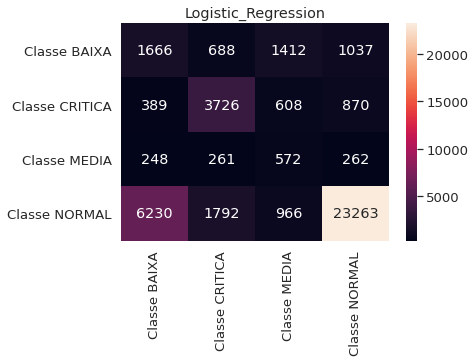

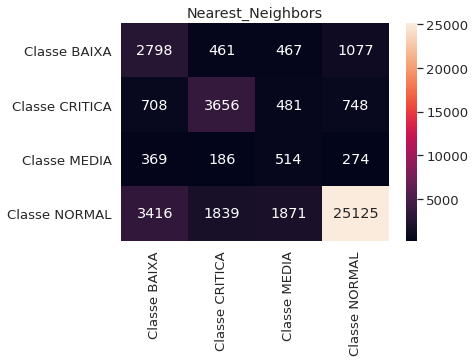

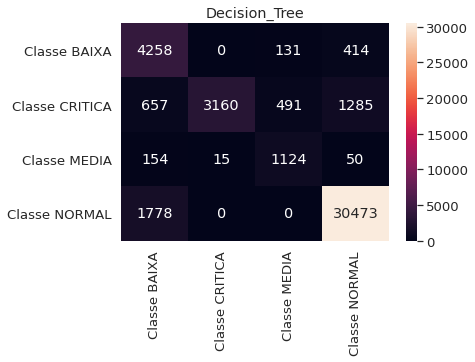

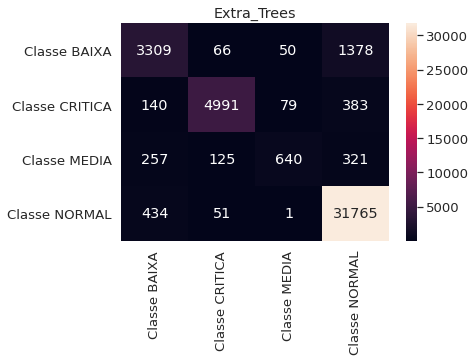

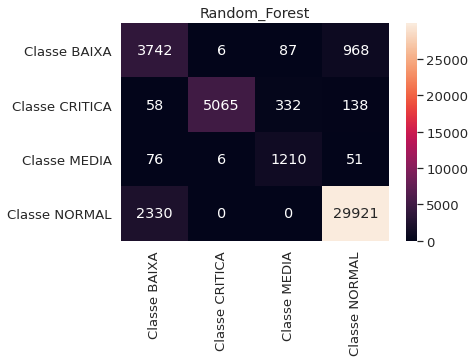

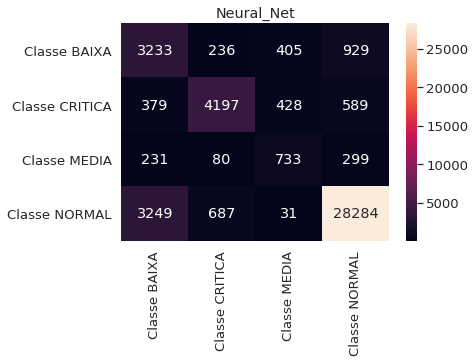

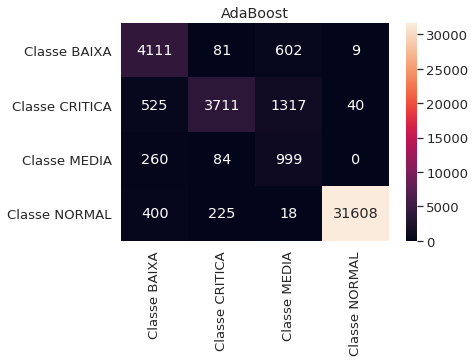

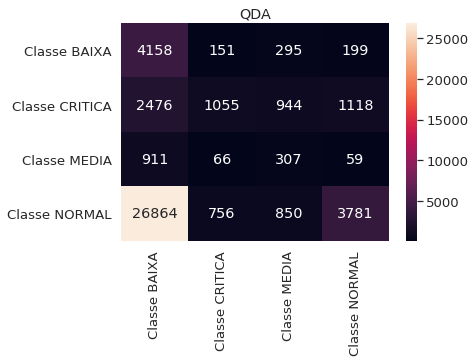

In [15]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "Neural_Net", "AdaBoost","QDA"]

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = imba_pipeline.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='d')
    #score = clf.score(X_test, y_test)
    #scores.append(score)

   

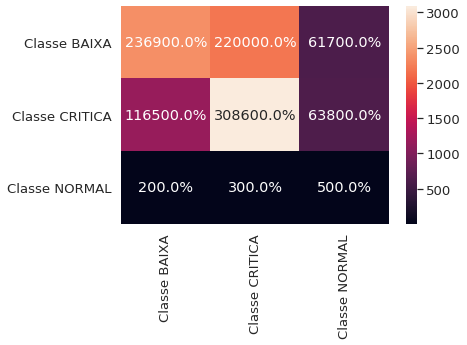

In [56]:
sns.set(font_scale=1.2)
plt.figure(figsize=(6,4))
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

sns.heatmap(df_cm, annot=True, fmt=".1%")
#sns.heatmap(cm, annot=True,fmt='d',labels = classes)

# **GridSearch**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
%matplotlib inline

#adasyn = ADASYN(random_state=88)
smt = SMOTE()
X_adasyn, y_adasyn = smt.fit_resample(X_train, y_train)

models = [     
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           'grid': {"max_depth":np.arange(8)+1}},
          
          {'name': 'etc','label': 'Extra Tree', 
           'classifier': ExtraTreesClassifier(random_state=88),
           'grid': {'n_estimators': [100,200, 500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}}]

                 
          
 
            

def model_selection(classifier, name, grid, X_train, y_train, scoring):
    random_seed = 1234
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), classifier)

    #cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    #clf = imba_pipeline.fit(X_train, y_train)

    gridsearch_cv=GridSearchCV(classifier,grid,cv=5,scoring = scoring)
    
    gridsearch_cv.fit(X_train, y_train)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['Accuracy'] = gridsearch_cv.best_score_
    
    return(results_dict)
results = []
for m in models:    
    print(m['name'])    
    results.append(model_selection(m['classifier'], 
                                   m['name'],
                                   m['grid'],
                                   X_adasyn, 
                                   y_adasyn, 
                                   'accuracy'))      
    print('completed')

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending = False)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


dsc
completed
etc
completed


In [48]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending = False)
results_df

,classifier_name,classifier,best_params,Accuracy
0,dsc,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",{'max_depth': 8},0.917466
1,etc,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...","{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.438876


In [50]:
results_df['classifier'][0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')

In [ ]:
print(classification_report(y_test,gradient_booster.predict(X_test))) 

# **Gradient Boosting**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

#kf = KFold(n_splits=5,random_state=42,shuffle=True)
#for train_index,val_index in kf.split(X):
#    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
#    y_train,y_val = y.iloc[train_index],y.iloc[val_index],

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


gradient_booster.fit(X_train_smt,y_train_smt)
  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
print(classification_report(y_test.argmax(axis=1),gradient_booster.predict(X_test)))  

AxisError: ignored

In [67]:
y_predict = gradient_booster.predict(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

Text(0.5, 58.5, 'Predição')

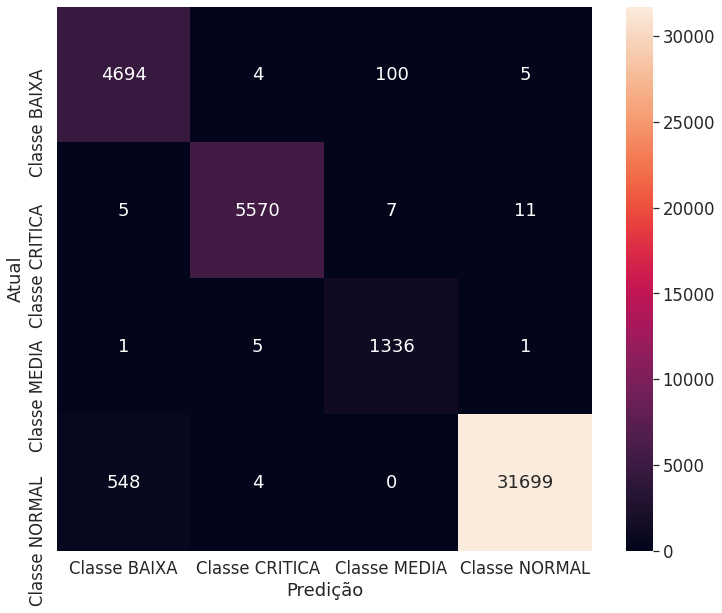

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


#confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))
cf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize = (12,10))
sns.set (font_scale = 1.5)
sns.heatmap(cf_matrix, annot=True, fmt='d',xticklabels=classes, yticklabels=classes)
plt.ylabel('Atual')
plt.xlabel('Predição')

In [72]:
import pickle
file_name = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/gb_4_classes.pkl"

# save
pickle.dump(gradient_booster, open(file_name, "wb"))

#gradient_booster.save('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/gb_4_classes.hdf5')

# **Análise de Único Classificador**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887701	total: 49ms	remaining: 48.9s
1:	learn: 0.6846857	total: 97.3ms	remaining: 48.5s
2:	learn: 0.6809188	total: 148ms	remaining: 49.1s
3:	learn: 0.6772200	total: 196ms	remaining: 48.8s
4:	learn: 0.6732721	total: 246ms	remaining: 48.9s
5:	learn: 0.6696389	total: 302ms	remaining: 50s
6:	learn: 0.6665537	total: 356ms	remaining: 50.4s
7:	learn: 0.6633864	total: 407ms	remaining: 50.4s
8:	learn: 0.6602664	total: 456ms	remaining: 50.2s
9:	learn: 0.6572496	total: 511ms	remaining: 50.6s
10:	learn: 0.6545329	total: 559ms	remaining: 50.3s
11:	learn: 0.6521286	total: 607ms	remaining: 49.9s
12:	learn: 0.6494679	total: 656ms	remaining: 49.8s
13:	learn: 0.6469493	total: 706ms	remaining: 49.7s
14:	learn: 0.6445117	total: 765ms	remaining: 50.2s
15:	learn: 0.6423691	total: 815ms	remaining: 50.1s
16:	learn: 0.6399398	total: 870ms	remaining: 50.3s
17:	learn: 0.6379991	total: 918ms	remaining: 50.1s
18:	learn: 0.6357652	total: 973ms	remaining: 50.2s
19:	learn: 0.6337909	total: 1.02s	remaining

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6889987	total: 48.4ms	remaining: 48.3s
1:	learn: 0.6848237	total: 96ms	remaining: 47.9s
2:	learn: 0.6811477	total: 145ms	remaining: 48.1s
3:	learn: 0.6776642	total: 194ms	remaining: 48.2s
4:	learn: 0.6739194	total: 277ms	remaining: 55.1s
5:	learn: 0.6706651	total: 326ms	remaining: 54s
6:	learn: 0.6676775	total: 376ms	remaining: 53.3s
7:	learn: 0.6645793	total: 425ms	remaining: 52.7s
8:	learn: 0.6615727	total: 484ms	remaining: 53.3s
9:	learn: 0.6589378	total: 542ms	remaining: 53.7s
10:	learn: 0.6563075	total: 595ms	remaining: 53.5s
11:	learn: 0.6539823	total: 645ms	remaining: 53.1s
12:	learn: 0.6512946	total: 697ms	remaining: 52.9s
13:	learn: 0.6488580	total: 751ms	remaining: 52.9s
14:	learn: 0.6462256	total: 801ms	remaining: 52.6s
15:	learn: 0.6440923	total: 850ms	remaining: 52.3s
16:	learn: 0.6421013	total: 908ms	remaining: 52.5s
17:	learn: 0.6400669	total: 957ms	remaining: 52.2s
18:	learn: 0.6379702	total: 1.01s	remaining: 52.1s
19:	learn: 0.6362080	total: 1.06s	remaining

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887558	total: 48.4ms	remaining: 48.4s
1:	learn: 0.6847386	total: 97.8ms	remaining: 48.8s
2:	learn: 0.6811483	total: 148ms	remaining: 49.4s
3:	learn: 0.6777784	total: 198ms	remaining: 49.2s
4:	learn: 0.6738580	total: 251ms	remaining: 50s
5:	learn: 0.6703751	total: 301ms	remaining: 49.8s
6:	learn: 0.6673443	total: 350ms	remaining: 49.7s
7:	learn: 0.6641297	total: 397ms	remaining: 49.3s
8:	learn: 0.6610232	total: 446ms	remaining: 49.1s
9:	learn: 0.6584733	total: 505ms	remaining: 50s
10:	learn: 0.6556690	total: 553ms	remaining: 49.7s
11:	learn: 0.6532332	total: 600ms	remaining: 49.4s
12:	learn: 0.6506719	total: 648ms	remaining: 49.2s
13:	learn: 0.6481534	total: 703ms	remaining: 49.5s
14:	learn: 0.6456671	total: 768ms	remaining: 50.4s
15:	learn: 0.6433305	total: 819ms	remaining: 50.4s
16:	learn: 0.6409532	total: 867ms	remaining: 50.1s
17:	learn: 0.6389223	total: 916ms	remaining: 50s
18:	learn: 0.6368405	total: 964ms	remaining: 49.8s
19:	learn: 0.6351138	total: 1.02s	remaining: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6890561	total: 56.1ms	remaining: 56s
1:	learn: 0.6850287	total: 108ms	remaining: 54.1s
2:	learn: 0.6809837	total: 162ms	remaining: 54s
3:	learn: 0.6775413	total: 219ms	remaining: 54.4s
4:	learn: 0.6734955	total: 285ms	remaining: 56.7s
5:	learn: 0.6704609	total: 351ms	remaining: 58.1s
6:	learn: 0.6676112	total: 406ms	remaining: 57.6s
7:	learn: 0.6644919	total: 459ms	remaining: 56.9s
8:	learn: 0.6612856	total: 518ms	remaining: 57s
9:	learn: 0.6585845	total: 571ms	remaining: 56.5s
10:	learn: 0.6557373	total: 629ms	remaining: 56.5s
11:	learn: 0.6532830	total: 683ms	remaining: 56.3s
12:	learn: 0.6508267	total: 745ms	remaining: 56.6s
13:	learn: 0.6485806	total: 801ms	remaining: 56.4s
14:	learn: 0.6462711	total: 855ms	remaining: 56.1s
15:	learn: 0.6441685	total: 907ms	remaining: 55.8s
16:	learn: 0.6418551	total: 965ms	remaining: 55.8s
17:	learn: 0.6396399	total: 1.02s	remaining: 55.6s
18:	learn: 0.6377161	total: 1.08s	remaining: 55.6s
19:	learn: 0.6360343	total: 1.13s	remaining: 5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887701	total: 49.2ms	remaining: 49.2s
1:	learn: 0.6846857	total: 98.8ms	remaining: 49.3s
2:	learn: 0.6809188	total: 147ms	remaining: 48.7s
3:	learn: 0.6772200	total: 194ms	remaining: 48.2s
4:	learn: 0.6732721	total: 242ms	remaining: 48.2s
5:	learn: 0.6696389	total: 301ms	remaining: 49.8s
6:	learn: 0.6665537	total: 349ms	remaining: 49.6s
7:	learn: 0.6633864	total: 398ms	remaining: 49.3s
8:	learn: 0.6602664	total: 449ms	remaining: 49.5s
9:	learn: 0.6572496	total: 503ms	remaining: 49.8s
10:	learn: 0.6545329	total: 555ms	remaining: 49.9s
11:	learn: 0.6521286	total: 612ms	remaining: 50.4s
12:	learn: 0.6494679	total: 663ms	remaining: 50.4s
13:	learn: 0.6469493	total: 716ms	remaining: 50.4s
14:	learn: 0.6445117	total: 768ms	remaining: 50.4s
15:	learn: 0.6423691	total: 817ms	remaining: 50.2s
16:	learn: 0.6399398	total: 875ms	remaining: 50.6s
17:	learn: 0.6379991	total: 930ms	remaining: 50.8s
18:	learn: 0.6357652	total: 979ms	remaining: 50.6s
19:	learn: 0.6337909	total: 1.03s	remai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6889987	total: 50.1ms	remaining: 50.1s
1:	learn: 0.6848237	total: 99.3ms	remaining: 49.6s
2:	learn: 0.6811477	total: 156ms	remaining: 51.9s
3:	learn: 0.6776642	total: 205ms	remaining: 51s
4:	learn: 0.6739194	total: 258ms	remaining: 51.3s
5:	learn: 0.6706651	total: 320ms	remaining: 53.1s
6:	learn: 0.6676775	total: 369ms	remaining: 52.4s
7:	learn: 0.6645793	total: 417ms	remaining: 51.7s
8:	learn: 0.6615727	total: 473ms	remaining: 52.1s
9:	learn: 0.6589378	total: 521ms	remaining: 51.6s
10:	learn: 0.6563075	total: 572ms	remaining: 51.4s
11:	learn: 0.6539823	total: 620ms	remaining: 51s
12:	learn: 0.6512946	total: 667ms	remaining: 50.6s
13:	learn: 0.6488580	total: 728ms	remaining: 51.3s
14:	learn: 0.6462256	total: 783ms	remaining: 51.4s
15:	learn: 0.6440923	total: 836ms	remaining: 51.4s
16:	learn: 0.6421013	total: 886ms	remaining: 51.2s
17:	learn: 0.6400669	total: 936ms	remaining: 51s
18:	learn: 0.6379702	total: 987ms	remaining: 50.9s
19:	learn: 0.6362080	total: 1.03s	remaining: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887558	total: 48.9ms	remaining: 48.8s
1:	learn: 0.6847386	total: 97.7ms	remaining: 48.8s
2:	learn: 0.6811483	total: 146ms	remaining: 48.6s
3:	learn: 0.6777784	total: 194ms	remaining: 48.3s
4:	learn: 0.6738580	total: 243ms	remaining: 48.4s
5:	learn: 0.6703751	total: 302ms	remaining: 50.1s
6:	learn: 0.6673443	total: 354ms	remaining: 50.2s
7:	learn: 0.6641297	total: 403ms	remaining: 50s
8:	learn: 0.6610232	total: 457ms	remaining: 50.4s
9:	learn: 0.6584733	total: 506ms	remaining: 50.1s
10:	learn: 0.6556690	total: 559ms	remaining: 50.3s
11:	learn: 0.6532332	total: 608ms	remaining: 50s
12:	learn: 0.6506719	total: 657ms	remaining: 49.9s
13:	learn: 0.6481534	total: 707ms	remaining: 49.8s
14:	learn: 0.6456671	total: 764ms	remaining: 50.2s
15:	learn: 0.6433305	total: 815ms	remaining: 50.1s
16:	learn: 0.6409532	total: 864ms	remaining: 50s
17:	learn: 0.6389223	total: 913ms	remaining: 49.8s
18:	learn: 0.6368405	total: 978ms	remaining: 50.5s
19:	learn: 0.6351138	total: 1.03s	remaining: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6890561	total: 51.5ms	remaining: 51.4s
1:	learn: 0.6850287	total: 104ms	remaining: 52.1s
2:	learn: 0.6809837	total: 158ms	remaining: 52.5s
3:	learn: 0.6775413	total: 212ms	remaining: 52.8s
4:	learn: 0.6734955	total: 270ms	remaining: 53.8s
5:	learn: 0.6704609	total: 322ms	remaining: 53.3s
6:	learn: 0.6676112	total: 375ms	remaining: 53.2s
7:	learn: 0.6644919	total: 426ms	remaining: 52.9s
8:	learn: 0.6612856	total: 483ms	remaining: 53.2s
9:	learn: 0.6585845	total: 538ms	remaining: 53.2s
10:	learn: 0.6557373	total: 593ms	remaining: 53.3s
11:	learn: 0.6532830	total: 650ms	remaining: 53.5s
12:	learn: 0.6508267	total: 713ms	remaining: 54.1s
13:	learn: 0.6485806	total: 767ms	remaining: 54s
14:	learn: 0.6462711	total: 820ms	remaining: 53.8s
15:	learn: 0.6441685	total: 873ms	remaining: 53.7s
16:	learn: 0.6418551	total: 937ms	remaining: 54.2s
17:	learn: 0.6396399	total: 990ms	remaining: 54s
18:	learn: 0.6377161	total: 1.04s	remaining: 53.9s
19:	learn: 0.6360343	total: 1.09s	remaining:

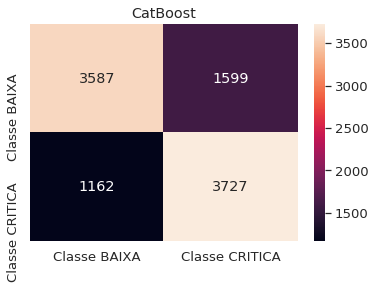

In [80]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
from catboost import Pool, CatBoostClassifier
import lightgbm
%matplotlib inline

random_seed = 1234

#names = ["MLPClassifier"]
names = ["CatBoost"]

classifiers = [
    MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)]

classifiers = [CatBoostClassifier(depth= 10, l2_leaf_reg= 5, learning_rate= 0.03)]
                                        

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = imba_pipeline.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='d')
    #score = clf.score(X_test, y_test)
    #scores.append(score)


# **Rede Neural**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.layers.core import Dropout
from keras.regularizers import l1
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical


# encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)

#Y_train = to_categorical(train_labels)
#Y_test  = to_categorical(test_labels)



smt = SMOTE()
Xf, yf = smt.fit_resample(X, Y)

yf = pd.get_dummies(yf)

yf = np.array(yf, dtype=np.float)
Xf = np.array(Xf, dtype=np.float)



##num_folds = 2

# Define the K-fold Cross Validator
##kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.3)
#y_train = to_categorical(y_train)
#y_test  = to_categorical(y_test)

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

##for train, test in kfold.split(Xf, yf):

#for train, test in cv.split(Xf, yf):  
classifier = Sequential()
  # Hidden Layer 1
classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal', input_dim=X.shape[1]))
classifier.add(Dropout(0.10))
  # Hidden Layer 2
 # classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
  #classifier.add(Dropout(0.10))
  # Hidden Layer 3
 # classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 4
classifier.add(Dense(72, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 5
  #classifier.add(Dense(72, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 6
classifier.add(Dense(36, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.5))
  # Hidden Layer 7
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
classifier.add(Dropout(0.15))
  #Output Layer
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal'))
  

  #Compiling the neural network
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

  # Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

  #Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=10,validation_data=(X_test, y_test), epochs=50)
  #history = classifier.fit(Xf[train],yf[train],validation_data=(Xf[test],yf[test]), batch_size=64, epochs=400)

scores = classifier.evaluate(X_test, y_test, verbose=0)

print(f'Score for fold {fold_no}: {classifier.metrics_names[0]} of {scores[0]}; {classifier.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])

  # Increase fold number
##fold_no = fold_no + 1


#eval_model=classifier.evaluate(X_train, y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
36122/36122 [==============================] - 88s 2ms/step - loss: 0.4728 - accuracy: 0.8167 - val_loss: 0.1709 - val_accuracy: 0.9373
Epoch 2/50
36122/36122 [==============================] - 87s 2ms/step - loss: 0.1752 - accuracy: 0.9366 - val_loss: 0.1459 - val_accuracy: 0.9447
Epoch 3/50
36122/36122 [==============================] - 87s 2ms/step - loss: 0.1562 - accuracy: 0.9437 - val_loss: 0.1190 - val_accuracy: 0.9564
Epoch 4/50
36122/36122 [==============================] - 88s 2ms/step - loss: 0.1447 - accuracy: 0.9478 - val_loss: 0.1062 - val_accuracy: 0.9611
Epoch 5/50
36122/36122 [==============================] - 87s 2ms/step - loss: 0.1365 - accuracy: 0.9509 - val_loss: 0.1084 - val_accuracy: 0.9601
Epoch 6/50
36122/36122 [==============================] - 87s 2ms/step - loss: 0.1333 - accuracy: 0.9523 - val_loss: 0.1089 - val_accuracy: 0.9585
Epoch 7/50
36122/3612

NameError: ignored

# **Visualiza Rede Neural**

In [40]:
!pip3 install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=5e57e514e7b69de0aa85c33bfa0903e8ff76278b0ac80ff82996e8517058c291
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [41]:
!pip install graphviz

In [44]:
import ann_visualizer as ann_viz

In [46]:
from ann_visualizer.visualize import ann_viz;

ann_viz(classifier, title="My first neural network")

In [49]:
figura = ann_viz(classifier, view=True, filename='/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/exemplo.png', title=' Rede Neural 4 Classes - Análise de Óleo')
figura

# **Relatórios da Rede Neural**

In [15]:
from keras.utils import plot_model
from keras.models import load_model

In [15]:
loss, accuracy = classifier.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = classifier.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

#Xf[train],yf[train],validation_data=(Xf[test],yf[test]

Training Accuracy: 0.9593
Testing Accuracy:  0.9588


In [13]:
path_modelo = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/4classesRN.hdf5"

In [18]:
print("[INFO] Gravando o modelo...")
classifier.save(path_modelo)


[INFO] serializing network...


In [16]:
model = load_model(path_modelo)

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 144)               2448      
_________________________________________________________________
dropout (Dropout)            (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 72)                10440     
_________________________________________________________________
dense_2 (Dense)              (None, 36)                2628      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                740       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 8

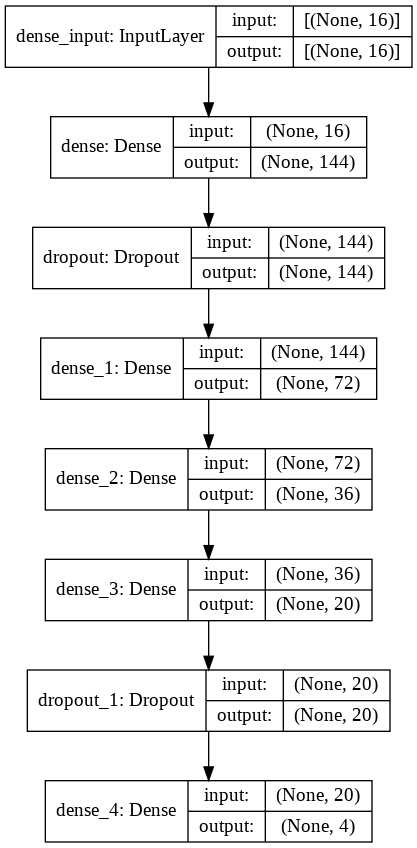

In [18]:
plot_model(model, to_file='/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/model_RN_4_Classes.png', show_shapes=True, show_layer_names=True)

In [24]:
from sklearn.preprocessing import LabelBinarizer
y_test = LabelBinarizer().fit_transform(y_test)
#testY = LabelBinarizer().fit_transform(X_test)

In [25]:
X_test = np.array(X_test, dtype=np.float)
y_test = np.array(y_test, dtype=np.float)
y_predict = model.predict(X_test, batch_size=32)

In [28]:
from sklearn.metrics import classification_report
report=classification_report(y_test.argmax(axis=1),y_predict.argmax(axis=1),target_names=classes)
report

'                precision    recall  f1-score   support\n\n  Classe BAIXA       0.43      0.96      0.60      4803\nClasse CRITICA       0.71      0.05      0.10      5593\n  Classe MEDIA       0.73      0.89      0.80      1343\n Classe NORMAL       1.00      0.97      0.98     32251\n\n      accuracy                           0.85     43990\n     macro avg       0.72      0.72      0.62     43990\n  weighted avg       0.89      0.85      0.82     43990\n'

Text(0.5, 58.5, 'Predição')

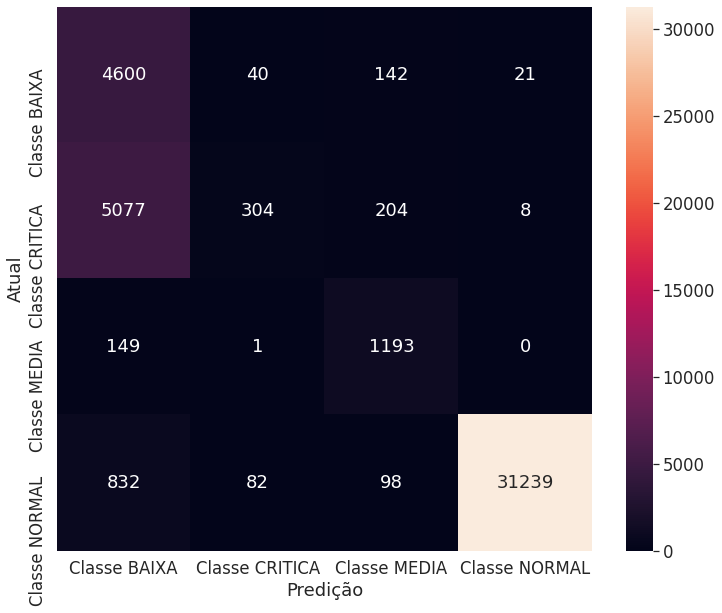

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


#confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))

plt.figure(figsize = (12,10))
sns.set (font_scale = 1.5)
sns.heatmap(cf_matrix, annot=True, fmt='d',xticklabels=classes, yticklabels=classes)
plt.ylabel('Atual')
plt.xlabel('Predição')
##sns.heatmap(cf_matrix, annot=True)
##sns.set (font_scale = 0.8)
#print(cf_matrix)
#sns.set(font_scale=1.2)
#plt.figure(figsize=(6,4))
#df_cm = pd.DataFrame(cf_matrix, index=classes, columns=classes)
#w=sns.heatmap(df_cm, annot=True, fmt=".1%")
#w 

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["Cracking","Junta", "Solda","Squat"]))

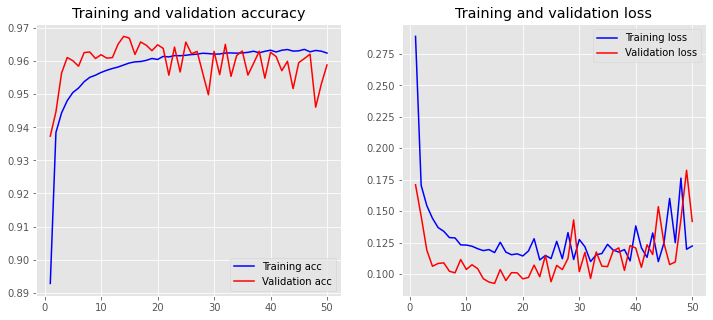

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)    

#dropout 0.25 em 2 camadas iniciais

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

# Curva **ROC**

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score



# Binarize the output

y_bin = label_binarize(Y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5,
                                                    random_state=0)
random_seed = 1224
random_state = 1


# Learn to predict each class against the other

model = svm.SVC(kernel='linear', probability=True,random_state=random_state)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

classifier = OneVsRestClassifier(imba_pipeline)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y1_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: ignored

In [19]:
y_test.ravel

<function ndarray.ravel>

In [108]:
pip install focal-loss

In [114]:
import numpy as np
from scipy import optimize
from scipy import special

class FocalLoss:

    def __init__(self, gamma, alpha=None):
        self.alpha = alpha
        self.gamma = gamma

    def at(self, y):
        if self.alpha is None:
            return np.ones_like(y)
        return np.where(y, self.alpha, 1 - self.alpha)

    def pt(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return np.where(y, p, 1 - p)

    def __call__(self, y_true, y_pred):
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        return -at * (1 - pt) ** self.gamma * np.log(pt)

    def grad(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma
        return at * y * (1 - pt) ** g * (g * pt * np.log(pt) + pt - 1)

    def hess(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma

        u = at * y * (1 - pt) ** g
        du = -at * y * g * (1 - pt) ** (g - 1)
        v = g * pt * np.log(pt) + pt - 1
        dv = g * np.log(pt) + g + 1

        return (du * v + u * dv) * y * (pt * (1 - pt))

    def init_score(self, y_true):
        res = optimize.minimize_scalar(
            lambda p: self(y_true, p).sum(),
            bounds=(0, 1),
            method='bounded'
        )
        p = res.x
        log_odds = np.log(p / (1 - p))
        return log_odds

    def lgb_obj(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        return self.grad(y, p), self.hess(y, p)

    def lgb_eval(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        is_higher_better = False
        return 'focal_loss', self(y, p).mean(), is_higher_better

In [124]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb


class OneVsRestLightGBMWithCustomizedLoss:

    def __init__(self, loss, n_jobs=3):
        self.loss = loss
        self.n_jobs = n_jobs

    def fit(self, X, y, **fit_params):

        self.label_binarizer_ = LabelBinarizer(sparse_output=True)
        Y = self.label_binarizer_.fit_transform(y)
        Y = Y.tocsc()
        self.classes_ = self.label_binarizer_.classes_
        columns = (col.toarray().ravel() for col in Y.T)
        if 'eval_set' in fit_params:
            # use eval_set for early stopping
            X_val, y_val = fit_params['eval_set'][0]
            Y_val = self.label_binarizer_.transform(y_val)
            Y_val = Y_val.tocsc()
            columns_val = (col.toarray().ravel() for col in Y_val.T)
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, X_val, column_val, **fit_params) for
                                                         i, (column, column_val) in
                                                         enumerate(zip(columns, columns_val)))
        else:
            # eval set not available
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, None, None, **fit_params) for i, column
                                                         in enumerate(columns))

        return self

    def _fit_binary(self, X, y, X_val, y_val, **fit_params):
        unique_y = np.unique(y)
        init_score_value = self.loss.init_score(y)
        if len(unique_y) == 1:
            estimator = _ConstantPredictor().fit(X, unique_y)
        else:
            fit = lgb.Dataset(X, y, init_score=np.full_like(y, init_score_value, dtype=float))
            if 'eval_set' in fit_params:
                val = lgb.Dataset(X_val, y_val, init_score=np.full_like(y_val, init_score_value, dtype=float),
                                  reference=fit)

                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      valid_sets=(fit, val),
                                      valid_names=('fit', 'val'),
                                      early_stopping_rounds=10,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)
            else:
                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)

        return estimator, init_score_value

    def predict(self, X):

        n_samples = X.shape[0]
        maxima = np.empty(n_samples, dtype=float)
        maxima.fill(-np.inf)
        argmaxima = np.zeros(n_samples, dtype=int)

        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            prob = special.expit(margins + init_score)
            np.maximum(maxima, prob, out=maxima)
            argmaxima[maxima == prob] = i

        return argmaxima

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], len(self.results_)))
        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            y[:, i] = special.expit(margins + init_score)
        y /= np.sum(y, axis=1)[:, np.newaxis]
        return y

In [132]:
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb
import torch
import torch.nn.functional as F
#from OneVsRestLightGBMWithCustomizedLoss import *
from focal_loss import BinaryFocalLoss
from sklearn.metrics import plot_confusion_matrix
import numpy as np
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb


class OneVsRestLightGBMWithCustomizedLoss:

    def __init__(self, loss, n_jobs=3):
        self.loss = loss
        self.n_jobs = n_jobs

    def fit(self, X, y, **fit_params):

        self.label_binarizer_ = LabelBinarizer(sparse_output=True)
        Y = self.label_binarizer_.fit_transform(y)
        Y = Y.tocsc()
        self.classes_ = self.label_binarizer_.classes_
        columns = (col.toarray().ravel() for col in Y.T)
        if 'eval_set' in fit_params:
            # use eval_set for early stopping
            X_val, y_val = fit_params['eval_set'][0]
            Y_val = self.label_binarizer_.transform(y_val)
            Y_val = Y_val.tocsc()
            columns_val = (col.toarray().ravel() for col in Y_val.T)
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, X_val, column_val, **fit_params) for
                                                         i, (column, column_val) in
                                                         enumerate(zip(columns, columns_val)))
        else:
            # eval set not available
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, None, None, **fit_params) for i, column
                                                         in enumerate(columns))

        return self

    def _fit_binary(self, X, y, X_val, y_val, **fit_params):
        unique_y = np.unique(y)
        init_score_value = self.loss.init_score(y)
        if len(unique_y) == 1:
            estimator = _ConstantPredictor().fit(X, unique_y)
        else:
            fit = lgb.Dataset(X, y, init_score=np.full_like(y, init_score_value, dtype=float))
            if 'eval_set' in fit_params:
                val = lgb.Dataset(X_val, y_val, init_score=np.full_like(y_val, init_score_value, dtype=float),
                                  reference=fit)

                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      valid_sets=(fit, val),
                                      valid_names=('fit', 'val'),
                                      early_stopping_rounds=10,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)
            else:
                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)

        return estimator, init_score_value

    def predict(self, X):

        n_samples = X.shape[0]
        maxima = np.empty(n_samples, dtype=float)
        maxima.fill(-np.inf)
        argmaxima = np.zeros(n_samples, dtype=int)

        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            prob = special.expit(margins + init_score)
            np.maximum(maxima, prob, out=maxima)
            argmaxima[maxima == prob] = i

        return argmaxima

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], len(self.results_)))
        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            y[:, i] = special.expit(margins + init_score)
        y /= np.sum(y, axis=1)[:, np.newaxis]
        return y

# Instantiate Focal loss
loss = FocalLoss(alpha=0.75, gamma=2.0)

# Not using early stopping
clf = OneVsRestLightGBMWithCustomizedLoss(loss=loss)
clf.fit(X_train, y_train)

# Using early stopping
#fit_params = {'eval_set': [(X_test, y_test)]}
#clf.fit(X_train, y_train, **fit_params)

y_test_pred = clf.predict(X_test)
pred_accuracy_score = accuracy_score(y_test, y_test_pred)
pred_recall_score = recall_score(y_test, y_test_pred, average='macro')
print('prediction accuracy', pred_accuracy_score,' recall ', pred_recall_score)

cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=labeles)
plt.figure()
plot_confusion_matrix(cnf_matrix, labels=classes,normalize=True,title='Confusion matrix')
plt.show()

prediction accuracy 0.6950917203767972  recall  0.4645311938664789


TypeError: ignored

In [126]:
classes

['Class 0', 'Class 1', 'Class 2']